# **Explore Air Quality Data for Mexico**

 Our objective is to gain insights into air pollution trends and assess the impact of different pollutants on air quality across different regions.

 We will perform exploratory data analysis (EDA) to uncover patterns and trends, visualize key metrics, and identify potential correlations between different pollutants and meteorological variables. By the end of this notebook, you'll gain a comprehensive understanding of Mexico's air quality and its variations.


# About the Dataset



# Analysis Details

This notebook will explore the descriptive statistics and Visualization tasks from the project tracker. Below are some of the tasks we will be looking into



*   **Univariate Analysis:** Explore and visualize individual features in the dataset to understand their distributions and statistics.
* **Bivariate Analysis:** Analyze the relationships between two features to uncover potential correlations or patterns.
* **Multivariate Analysis:** Examine interactions among multiple features to identify complex patterns and insights.
* **Time Series Analysis:** Investigate how air quality measurements change over time and identify any trends or seasonal effects.
* **Conclusion:** Summarize the findings from the analysis, highlight key insights, and suggest potential actions or further research.



In [1]:
import numpy as np
import pandas as pd

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
plt.style.use('ggplot')

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df=pd.read_csv('/content/sample_data/mer_imputed_merged_data.csv')
df.head(5)

datetime  direct_radiation (W/m²)  PM25_MER  PM10_MER  SO2_MER  \
0  2020-11-25 01:00:00                        0      35.0      72.0      8.0   
1  2020-11-25 02:00:00                        0      43.0      73.0      7.0   
2  2020-11-25 03:00:00                        0      37.0      60.0      6.0   
3  2020-11-25 04:00:00                        0      34.0      51.0      4.0   
4  2020-11-25 05:00:00                        0      28.0      59.0      5.0   

   O3_MER  NO2_MER  CO_MER  RH_MER  TMP_MER  WDR_MER  WSP_MER  is_festival  \
0     1.0     47.0     1.8    44.0     15.6    256.0      0.5            0   
1     1.0     43.0     1.3    47.0     15.0    296.0      0.7            0   
2     1.0     39.0     0.9    49.0     14.4    302.0      0.5            0   
3     1.0     37.0     0.4    51.0     13.6    320.0      0.7            0   
4     1.0     40.0     0.7    56.0     12.6     90.0      1.2            0   

   is_weekend  AirQualityIndex  
0           0                4  
1           0                4  
2           0                4  
3           0                4  
4           0                4

In [ ]:
df.tail(2)

datetime  direct_radiation (W/m²)  PM25_MER  PM10_MER  \
26786  2023-12-31 00:00:00                       66      43.0      59.0   
26787  2024-01-01 00:00:00                        3      52.0      73.0   

       SO2_MER  O3_MER  NO2_MER  CO_MER  RH_MER  TMP_MER  WDR_MER  WSP_MER  \
26786     12.0     6.0     47.0    0.89    54.0     13.8    298.0      1.6   
26787      3.0     2.0     52.0    1.30    56.0     14.5    316.0      0.6   

       is_festival  is_weekend  AirQualityIndex  
26786            0           1                4  
26787            1           0                5

## **Univariate Analysis of Air Quality Metrics**

In this section, we will delve into the univariate analysis of the key air quality metrics in our dataset. The goal is to gain a deeper understanding of the distribution and characteristics of each variable individually. We will use various types of visualizations to achieve this:

***Histogram:*** To examine the frequency distribution of each air quality metric, providing insights into the overall spread and common values.
***Violin Plot:*** To visualize the distribution of each variable, highlighting the density and potential multi-modality of the data.

***Box Plot:*** To identify the central tendency, spread, and outliers in the data, giving a clear picture of the variability and extremes.

***Bar Plot:*** To summarize the mean values of the air quality metrics, enabling a straightforward comparison between different variables.


These visualizations will help us to better understand the data and inform further analysis steps. Each plot type provides unique insights into the dataset, enabling us to explore patterns and anomalies effectively.

In [ ]:
df.columns

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_MER', 'PM10_MER',
       'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER',
       'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')

**1. Histogram**

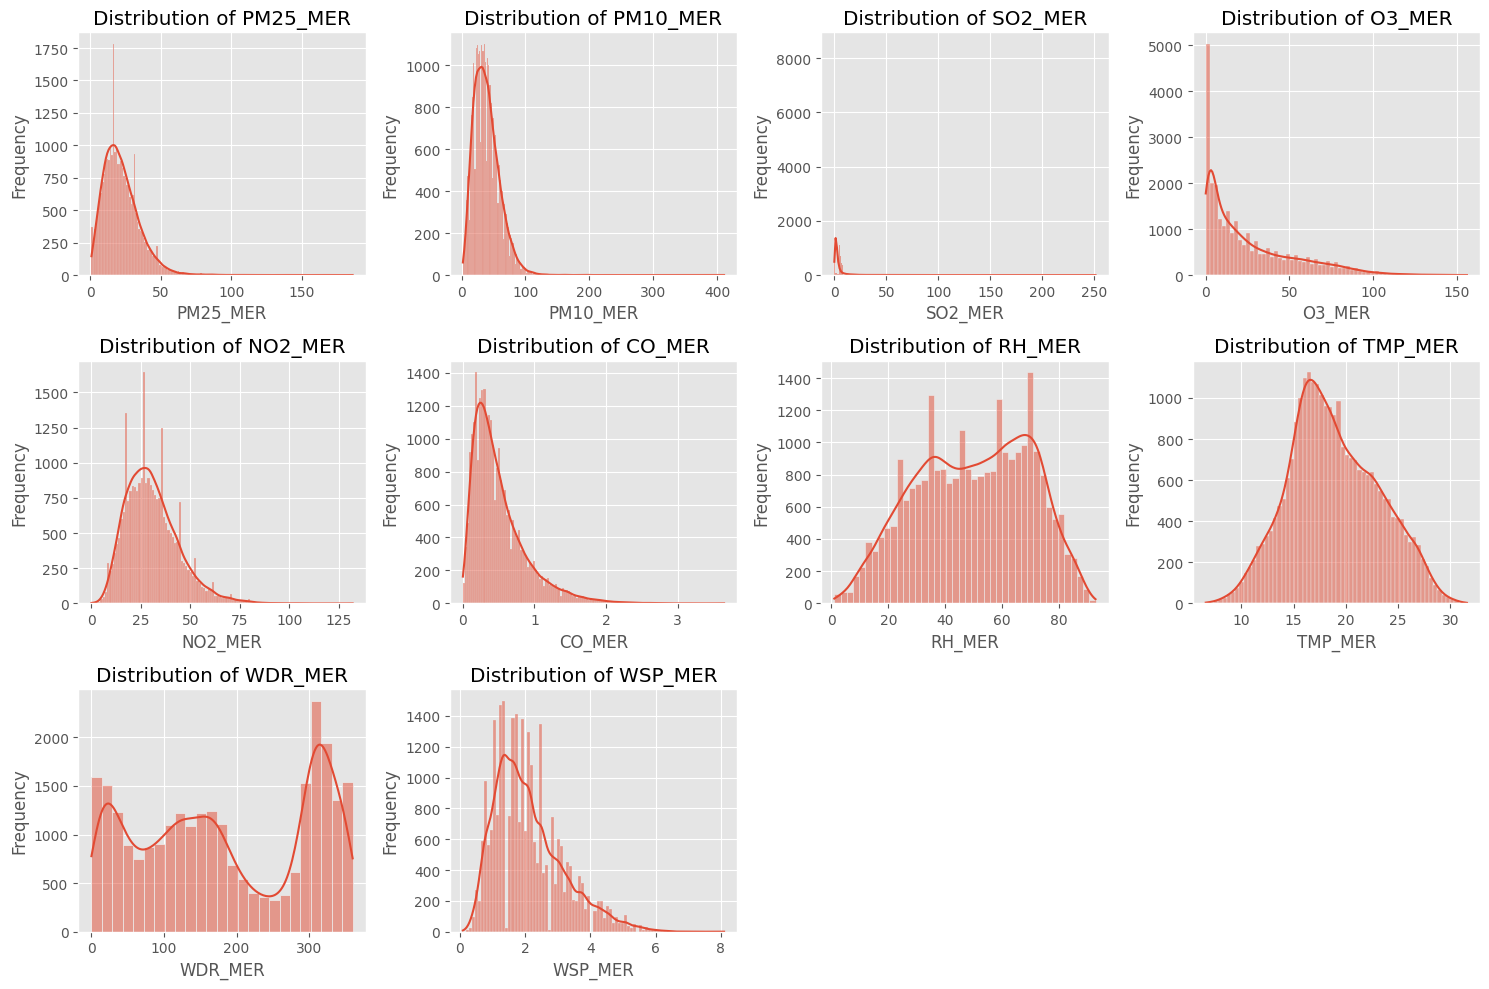

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select pollutant and meteorological columns for the histogram
pollutant_columns = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
meteorological_columns = ['RH_MER', 'TMP_MER', 'WDR_MER', 'WSP_MER']
columns_to_plot = pollutant_columns + meteorological_columns

# Create the histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(df[col], kde=True)  # Use kde=True for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Explanation of results (example - adapt to your actual data)
# Observe the shape of each histogram.
# A normal distribution (bell curve) indicates a symmetrical spread of data around the mean.
# Skewed distributions (right or left skewed) show a concentration of data on one side of the mean.
# The presence of multiple peaks (multimodal) may indicate different underlying processes affecting the data.
# Identify outliers based on the tails of the distribution.
#  Note the range and typical values for each variable.
#  Compare the distributions of different pollutants and meteorological variables to look for potential relationships.
# Examples:
#  High right skew in PM2.5 might indicate less frequent high pollution events.
#  A high correlation between temperature and ozone might point to photochemical reactions.

In [ ]:
columns_to_analyze = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER', 'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend']


**2. Violin Plots**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()


for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Violin(
        y=df[column],
        name=column,
        box_visible=True,
        meanline_visible=True,
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))


fig.update_layout(
    title='Violin Plots of Pollutants and Meteorological Data',
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

**3. Box Plots**

In [ ]:
colors = [
    'rgb(31, 119, 180)',
    'rgb(255, 127, 14)',
    'rgb(44, 160, 44)',
    'rgb(214, 39, 40)',
    'rgb(148, 103, 189)',
    'rgb(140, 86, 75)',
    'rgb(227, 119, 194)',
    'rgb(127, 127, 127)',
    'rgb(188, 189, 34)', 'rgb(0, 128, 0)',
    'rgb(128, 0, 128)',
    'rgb(0, 0, 128)']
fig = go.Figure()

# Add box plots with customized colors
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(color=colors[i], line=dict(width=1)),
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))

# Update layout with a more beautiful design
fig.update_layout(
    title='Box Plots of Pollutants and Meteorological Data',
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

**4. Bar Plot**

***Mean and Standard Deviation of Pollutants and Meteorological Data***

In [ ]:
import plotly.express as px
# Example data for bar plot (replace with actual summary statistics)
bar_data = df.drop('datetime',axis=1).describe().transpose().reset_index()
bar_data = bar_data[['index', 'mean', 'std']].rename(columns={'index': 'Feature'})
fig = px.bar(
    bar_data,
    x='Feature',
    y='mean',
    error_y='std',
    color='Feature',
    color_discrete_sequence=colors,
    title='Mean and Standard Deviation of Pollutants and Meteorological Data'
)
fig.update_layout(
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)
fig.show()

**5. Histogram and Box-plot**

***Distribution of Individual plot of Pollutants and Meteorological Data Using***

In [ ]:
import plotly.subplots as sp
# Create subplots
fig = sp.make_subplots(rows=4, cols=3, subplot_titles=columns_to_analyze, vertical_spacing=0.1, horizontal_spacing=0.1)
# Add histograms to subplots
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ), row=(i//3)+1, col=(i%3)+1)
# Update layout for histograms
fig.update_layout(
    title_text='Distribution of Pollutants and Meteorological Data',
    showlegend=False,
    template='plotly_white',
    height=900,
    width=1200
)
fig.show()
# Create subplots
fig = sp.make_subplots(rows=4, cols=3, subplot_titles=columns_to_analyze, vertical_spacing=0.1, horizontal_spacing=0.1)
# Add box plots to subplots
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(line=dict(width=1))
    ), row=(i//3)+1, col=(i%3)+1)
# Update layout for box plots
fig.update_layout(
    title_text='Box Plots of Pollutants and Meteorological Data',
    showlegend=False,
    template='plotly_white',
    height=900,
    width=1200
)
fig.show()

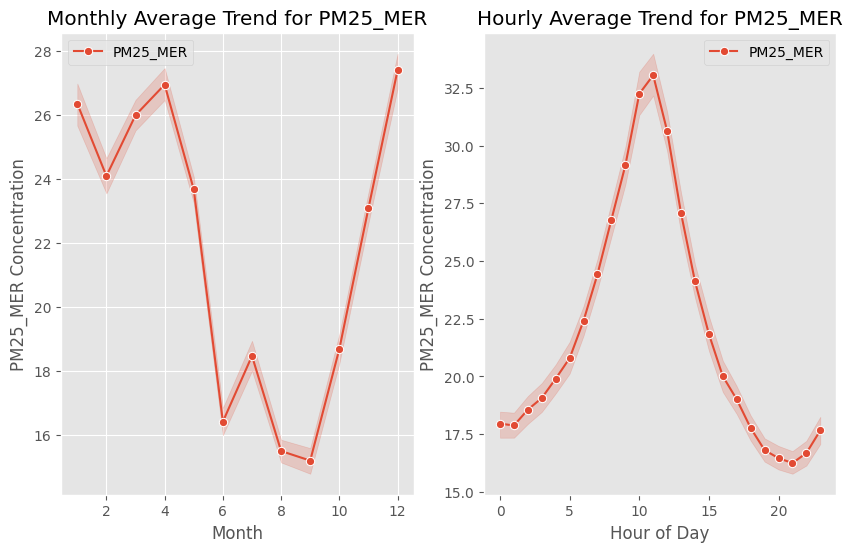

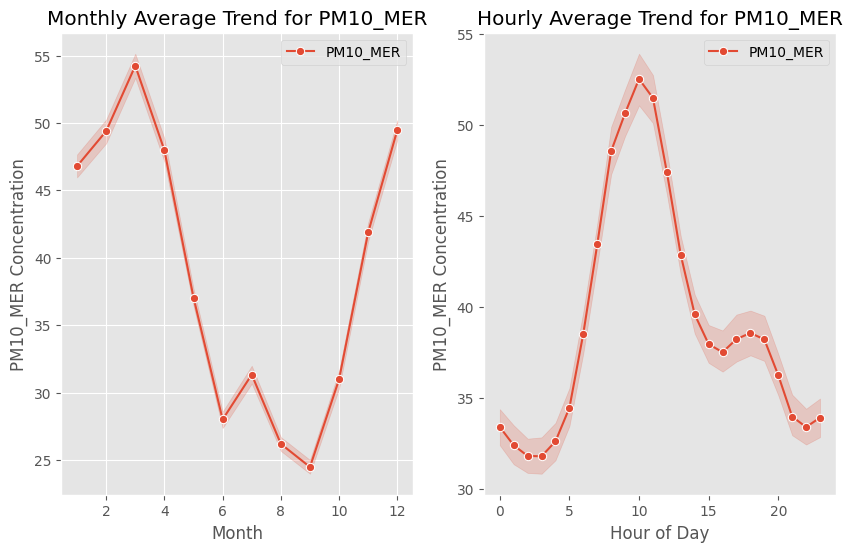

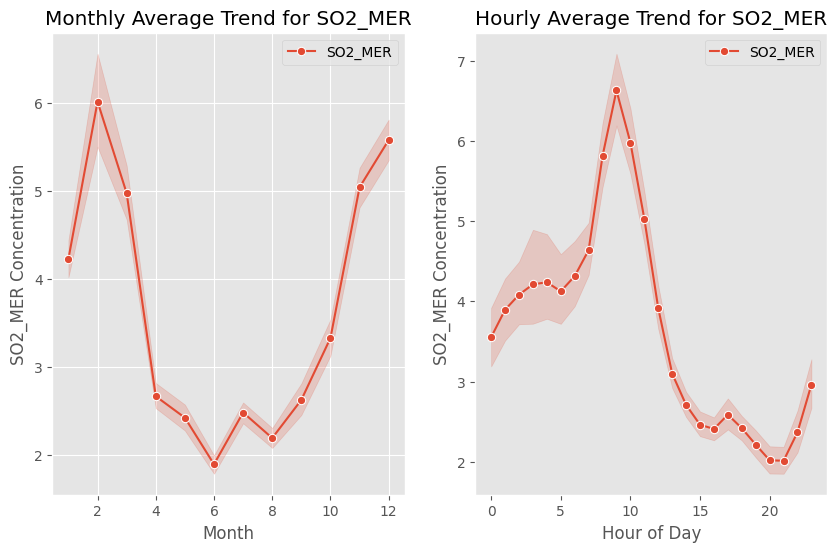

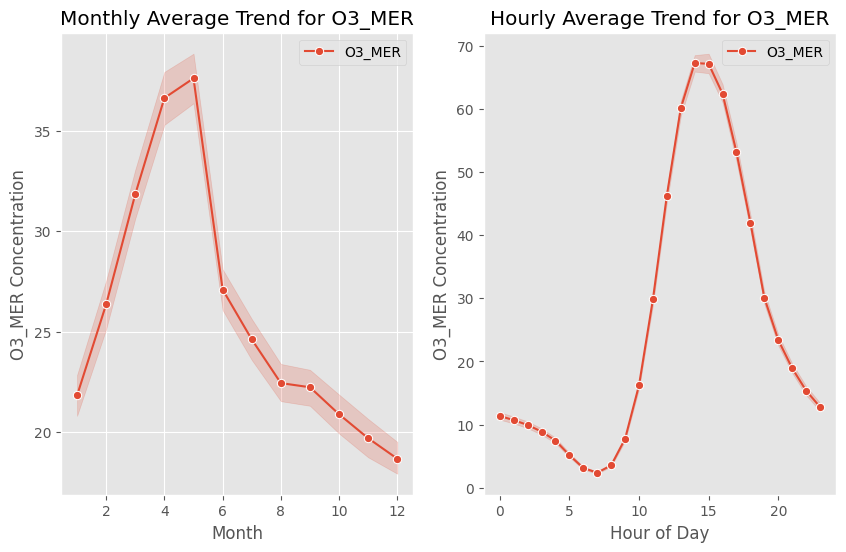

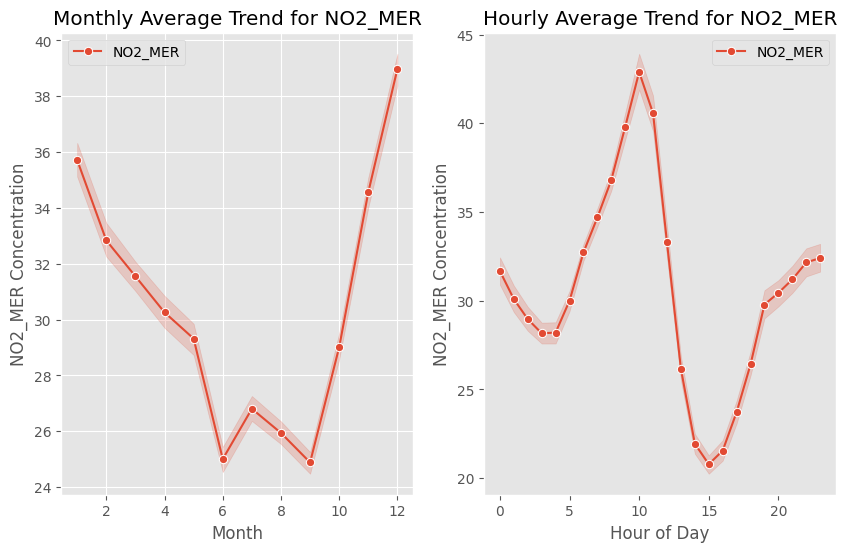

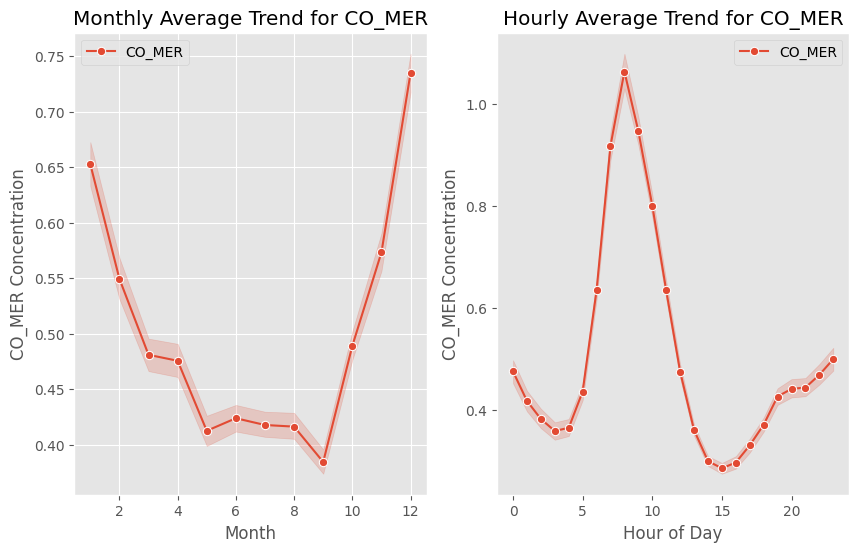

In [8]:
# Analyze seasonal and hourly patterns
def seasonal_hourly_and_monthly_analysis(df):
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['month'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour

    pollutants = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
    for pollutant in pollutants:
        plt.figure(figsize=(10, 6))
        plt.subplot(1,2,1)
        sns.lineplot(x='month', y=pollutant, data=df, marker="o", label=pollutant)
        plt.title(f"Monthly Average Trend for {pollutant}")
        plt.xlabel("Month")
        plt.ylabel(f"{pollutant} Concentration")
        #plt.figure(figsize=(6, 6))
        plt.subplot(1,2,2)
        sns.lineplot(x='hour', y=pollutant, data=df, marker="o", label=pollutant)
        plt.title(f"Hourly Average Trend for {pollutant}")
        plt.xlabel("Hour of Day")
        plt.ylabel(f"{pollutant} Concentration")
        plt.grid()
        plt.show()

seasonal_hourly_and_monthly_analysis(df)

**Summary of the univariate analysis**

| **Variable**   | **Stats & Distribution**                                                                                                                                | **Key Insights**                                                                                                                                                                                                                                                 |
|----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **PM25_MER**   | - **Mean**: 21.93<br>- **Median**: 20<br>- **IQR**: 13–29<br>- **Range**: ~10–175 (outliers above ~53)<br>- **Distribution**: Right-skewed                                                     | - Most values in 10–30 range<br>- Occasional high spikes up to 175<br>- Moderate pollution most of the time, but infrequent high pollution events<br>- Highlights need to address spikes from industrial/traffic emissions                                       |
| **PM10_MER**   | - **Mean**: 39.13<br>- **Median**: 36<br>- **IQR**: 24–51<br>- **Range**: ~10–400 (outliers above ~91.5)<br>- **Distribution**: Right-skewed                                                   | - Frequent moderate levels (30–50)<br>- Rare but significant pollution spikes up to 400<br>- Larger range and more frequent extremes compared to PM2.5<br>- Emphasizes monitoring/mitigation of high-pollution events (construction, heavy traffic, industrial) |
| **O3_MER**     | - **Mean**: 25.62<br>- **Median**: 16<br>- **IQR**: 4–40<br>- **Range**: ~0–160 (outliers above ~94)<br>- **Distribution**: Right-skewed                                                       | - Most values under 50<br>- Occasional spikes up to 160<br>- Driven by photochemical reactions (sunlight + emissions)<br>- High levels (>94) may pose respiratory risks and form smog                                                                              |
| **SO2_MER**    | - **Mean**: 3.65<br>- **Median**: 2<br>- **IQR**: 1–4<br>- **Range**: ~0–250 (outliers above ~8.5)<br>- **Distribution**: Heavily right-skewed                                                 | - Typically very low (near 0)<br>- Occasional extreme spikes (up to 250)<br>- Indicates industrial or high-sulfur fuel combustion<br>- Monitoring needed for sporadic high-emission events                                                                        |
| **NO2_MER**    | - **Mean**: 30.60<br>- **Median**: 29<br>- **IQR**: 21–38<br>- **Range**: ~0–120 (outliers above ~63.5)<br>- **Distribution**: Moderately right-skewed                                         | - Most values 20–40<br>- Spikes up to 120 (likely traffic/industrial sources)<br>- Elevated levels (>63.5) pose respiratory risks<br>- Important for urban pollution control                                                                                     |
| **CO_MER**     | - **Mean**: 0.50<br>- **Median**: 0.4<br>- **IQR**: 0.24–0.67<br>- **Range**: ~0–3.5 (outliers above ~1.31)<br>- **Distribution**: Right-skewed                                                | - Low baseline (0–1.0) <br>- Occasional spikes up to 3.5<br>- Primarily from vehicle or industrial emissions<br>- Generally safe levels but requires monitoring in high-traffic zones                                                                            |
| **RH_MER**     | - **Mean**: 49.90<br>- **Median**: 51<br>- **IQR**: 34–67<br>- **Range**: 0–100<br>- **Distribution**: Slightly bimodal (peaks ~40–50 and 60–70)                                               | - No major outliers<br>- Typical clustering in 40–70<br>- Bimodal nature suggests distinct seasonal/humidity regimes<br>- Stable, consistent range important for weather/environmental assessments                                                               |
| **TMP_MER**    | - **Mean**: 18.84<br>- **Median**: 18.4<br>- **IQR**: 15.82–21.9<br>- **Range**: ~5–32 (outliers <10 or >30)<br>- **Distribution**: Nearly bell-shaped, slight normality                          | - Most values near 18–20<br>- Rare extremes (<10 or >30)<br>- Suggests a temperate climate<br>- Symmetry indicates stable temperature patterns                                                                                                                    |
| **WDR_MER**    | - **Mean**: 184.42<br>- **Median**: 170<br>- **IQR**: 84–306<br>- **Range**: 0–360<br>- **Distribution**: Multi-modal (peaks around 50–100, 150, 250–300)                                       | - Wind directions cluster at specific angles<br>- No outliers since 0–360 is valid range<br>- Dominant wind directions important for pollution transport & wind energy planning<br>- Reflects local geography/seasonal patterns                                    |
| **WSP_MER**    | - **Mean**: 2.10<br>- **Median**: 1.9<br>- **IQR**: 1.3–2.7<br>- **Range**: 0–8 (outliers above 4)<br>- **Distribution**: Right-skewed                                                          | - Calm to moderate speeds (0–2) common<br>- Occasional strong winds up to 8<br>- Useful for predicting pollutant dispersion<br>- Planning for rare high-wind events (infrastructure, safety)                                                                      |
| **is_festival**| - **Binary**: 0 or 1<br>- **0**: 25,442 (95%); **1**: 1,346 (5%)<br>- Highly imbalanced variable                                                                                                 | - Significantly fewer festival days<br>- May need special handling in models (resampling/weighting)<br>- Potential for unique pollution/traffic patterns on festival days                                                                                       |
| **is_weekend** | - **Binary**: 0 or 1<br>- **0**: 19,154 (~71.5%); **1**: 7,634 (~28.5%)<br>- More balanced than is_festival                                                                                     | - Allows analysis of weekday vs. weekend trends<br>- Could correlate with traffic or pollution differences                                                                                                                 |
| **AirQualityIndex** | - **Categorical** (1–5):<br> 1 (Good), 2 (Acceptable), 3 (Bad), 4 (Very Bad), 5 (Extremely Bad)<br>- **Distribution**: 4 (Very Bad) is most frequent; 1 (Good) least frequent              | - Levels 4 and 2 together ~40.8% (dominant)<br>- Fairly even spread across categories, but skewed toward worse quality<br>- Rare “Good” air days<br>- Highlights concern for moderate-to-very-bad air quality                                                      |
| **direct_radiation** | - **Heavily right-skewed**<br>- Most values near 0 W/m²<br>- Narrow IQR, with a long tail of outliers                                                                                      | - Sharp peak at low radiation<br>- Occasional high spikes, possibly weather-driven<br>- Outliers require further investigation (could be intense sun or measurement anomalies)                                                                                  |


## **Bivariate Analysis and Correlation Heatmap**
In this section, we will perform bivariate analysis by visualizing the correlations between various columns in our dataset. We will use heatmaps to illustrate the strength and direction of relationships between pairs of variables. This analysis helps us understand how different features interact with each other, which can provide valuable insights into the underlying data patterns and inform our modeling approach.

In [ ]:
import plotly.express as px

# Calculate correlation matrix
correlation_matrix = df[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER', 'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend']].corr()

# Create a heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',  # Different color scale
    title='Correlation Matrix Heatmap',
    labels={'color': 'Correlation Coefficient'}
)

# Update layout for heatmap with increased size
fig.update_layout(
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=80, r=80, t=80, b=80),
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=45),
    height=800,  # Increase height
    width=1000   # Increase width
)

fig.show()

## **Multivariate and Time Series Analysis**


In [ ]:
df.columns

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_MER', 'PM10_MER',
       'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER',
       'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')

In [ ]:
import pandas as pd


df['datetime'] = pd.to_datetime(df['datetime'])

# Extract month and year
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year

# Aggregate data by Month and year
monthly_country_city_summary = df.groupby(['Year', 'Month']).agg({
    'PM25_MER': 'mean',
    'PM10_MER': 'mean',
    'SO2_MER': 'mean',
    'O3_MER': 'mean',
    'NO2_MER': 'mean',
    'CO_MER': 'mean',
     'RH_MER': 'mean',
     'TMP_MER': 'mean',
     'WDR_MER': 'mean',
    'WSP_MER': 'mean',
    'is_festival': 'mean',
    'is_weekend': 'mean'
}).reset_index()

# Display the first few rows
monthly_country_city_summary.head()

Year  Month   PM25_MER   PM10_MER   SO2_MER     O3_MER    NO2_MER  \
0  2020     11  32.230769  64.412587  6.386874  22.656031  42.351107   
1  2020     12  27.840991  51.447541  7.092926  21.861130  36.046434   
2  2021      1  24.658825  46.931409  4.182075  21.298539  34.404442   
3  2021      2  26.907645  55.477493  7.539760  28.646205  33.664559   
4  2021      3  28.957731  61.109585  7.064138  34.281138  30.937640   

     CO_MER     RH_MER    TMP_MER     WDR_MER   WSP_MER  is_festival  \
0  0.695416  37.748252  18.197203  201.076923  1.661538     0.000000   
1  0.528551  48.461801  16.544689  169.992661  1.824483     0.066574   
2  0.622456  46.052778  16.127639  171.918056  1.806250     0.033333   
3  0.557473  32.117560  17.698602  172.549107  2.091220     0.107143   
4  0.424223  31.948925  20.039400  172.650538  2.174731     0.064516   

   is_weekend  
0    0.335664  
1    0.266297  
2    0.333333  
3    0.285714  
4    0.258065